# Data processing: step 3

Make cuts on the events, define a signal region, split into train-test, preprocess

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from helpers.plotting import *


In [29]:
codes_list = ["od"]#, "sim_zmm_forcms_1k-mz90.1-mw80.4_8000030"]

uncut_data = {}
for code in codes_list:
    uncut_data[code] = np.load(f"compiled_data/{code}.npy")
    
    uncut_data[code] = np.nan_to_num(uncut_data[code])

In [30]:
# plotting params

feature_labels = ["jet $p_T$", "jet $\eta$", "jet $\phi$", "jet $M$", "jet $\\tau_{21}$","$\mu\mu$ $p_T$", "$\mu\mu$ $\eta$", "$\mu\mu$ $\phi$", "$\mu\mu$ $M$"]

n_bins = 60

feature_bins = [
       np.linspace(0, 300, n_bins),
       np.linspace(-6, 6, n_bins),
       np.linspace(-3.2, 3.2, n_bins),
       np.linspace(20, 120, n_bins),
       np.linspace(0, 1, n_bins),
        np.linspace(0, 800, n_bins),
       np.linspace(-6, 6, n_bins),
       np.linspace(-3.2, 3.2, n_bins),
       np.linspace(20, 120, n_bins),]




kwargs_dict = {"od":  {"density": True, 
                       "histtype": "step", 
                       "color":"blue",
                       "label": "OD"},
               
              "sim_zmm_forcms_1k-mz90.1-mw80.4_8000030":  {"density": True, 
                       "histtype": "step", 
                       "color":"red",
                       "label": "mZ=90"},
               
               "sim_wp_wzpythia_forcms_1k-mz50.0-mw40.0-mwp1000_8000199":  {"density": True, 
                       "histtype": "step", 
                       "color":"green",
                       "label": "mZ=50"},
               
               "sim_wp_wzpythia_forcms_1k-mz70.0-mw60.0-mwp1200_8000200":  {"density": True, 
                       "histtype": "step", 
                       "color":"orange",
                       "label": "mZ=70"},}

## Visualize the data

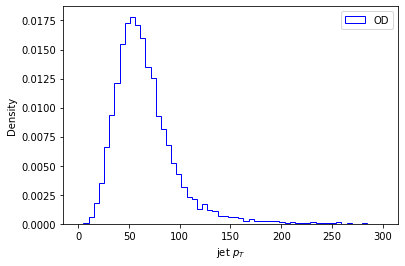

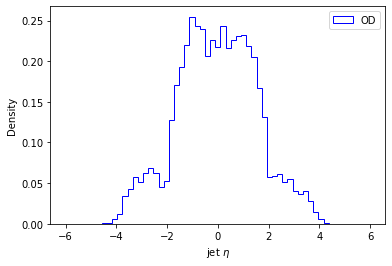

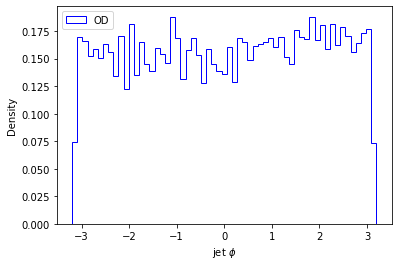

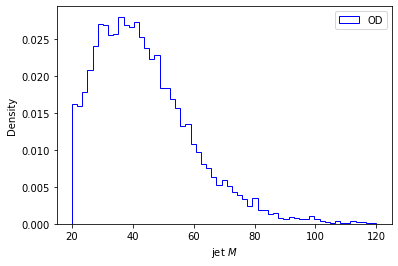

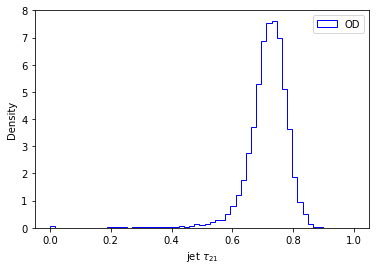

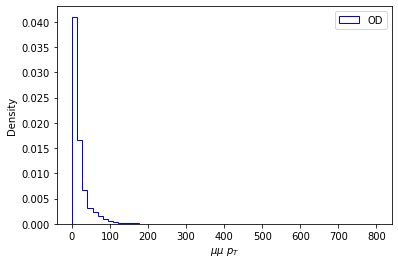

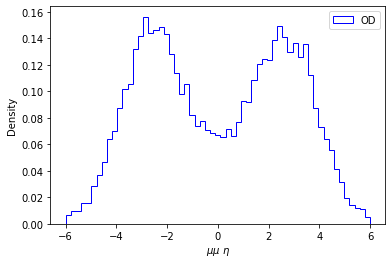

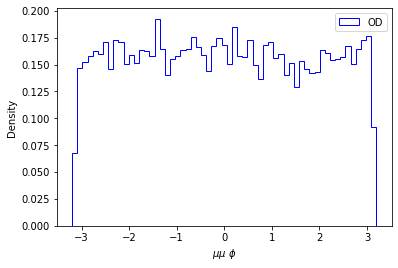

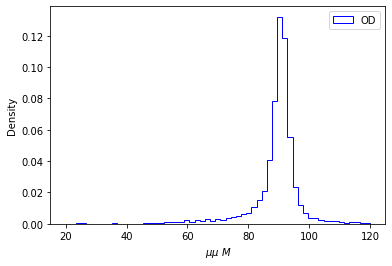

In [31]:
    
    
hist_all_features(codes_list, uncut_data, kwargs_dict, feature_labels, feature_bins)
    


## Make cuts

Now let's define cuts on the data. 

Muon cuts were made previously (and we don't want to make cuts on the dimuon system, either)

In [32]:
# jet_cuts

jet_pt_cut = 40
jet_eta_cut = 2.5

cut_data = {}
for code in codes_list:
    
    # pt_cut, eta cut on the jets
    pass_indices = (uncut_data[code][:,0] > jet_pt_cut) & (np.abs(uncut_data[code][:,1]) < jet_eta_cut)
    cut_data[code] = uncut_data[code][pass_indices]
    print(cut_data[code].shape)
    
   

    

(7432, 9)


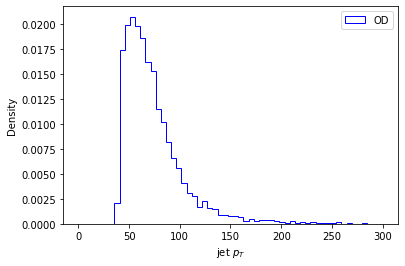

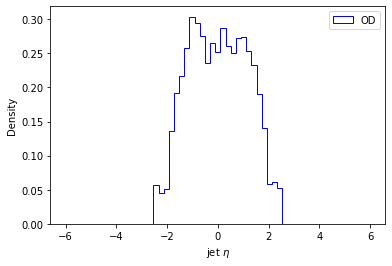

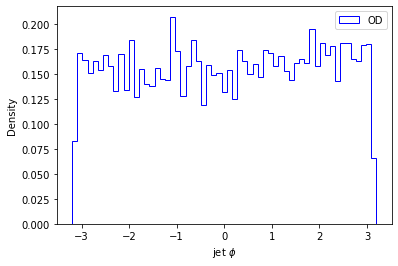

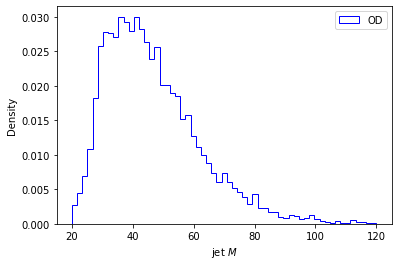

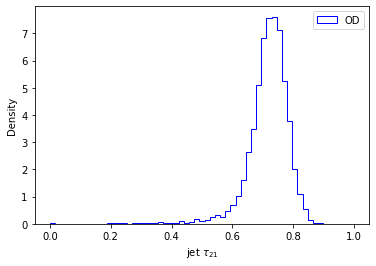

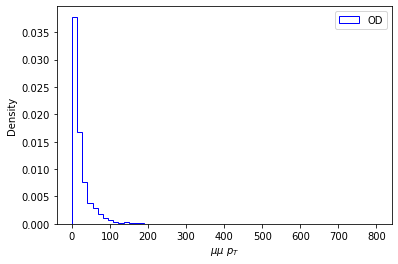

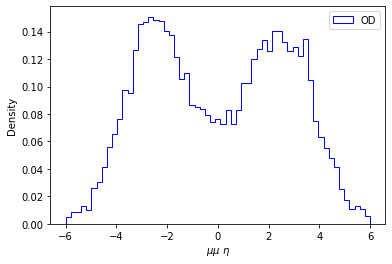

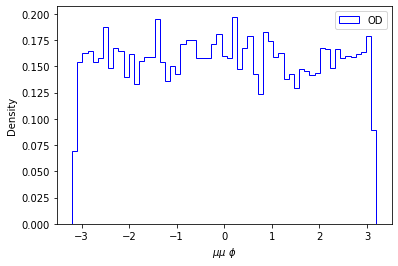

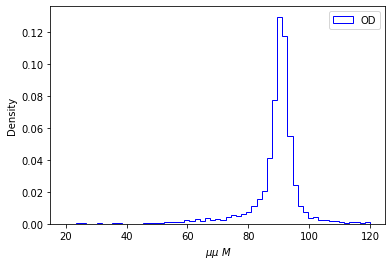

In [33]:
    
    
hist_all_features(codes_list, cut_data, kwargs_dict, feature_labels, feature_bins, image_path = "plots/cut_data")
    

## Define SR / SB

Signal region can be anywhere from 10 - 90 geV

In [40]:
SR_data_preprocc = {}
SB_data_preprocc = {}

SB1_lower, SB1_higher = 15, 40
SR_lower, SR_higher = 30, 60
SB2_lower, SB2_higher = 60, 80

for code in codes_list:

    pass_indices_SR = (cut_data[code][:,-1] > SR_lower) & (cut_data[code][:,-1] < SR_higher)
    pass_indices_SB = ((cut_data[code][:,-1] > SB1_lower) & (cut_data[code][:,-1] < SB1_higher)) | ((cut_data[code][:,-1] > SB2_lower) & (cut_data[code][:,-1] < SB2_higher))
    
    SR_data_preprocc[code] = cut_data[code][pass_indices_SR]
    SB_data_preprocc[code] = cut_data[code][pass_indices_SB]
    
    print(SR_data_preprocc[code].shape)
    print(SB_data_preprocc[code].shape)

    
    

(115, 9)
(537, 9)


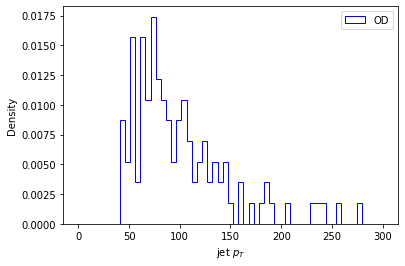

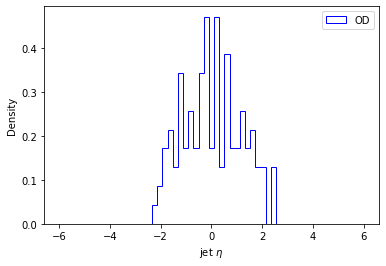

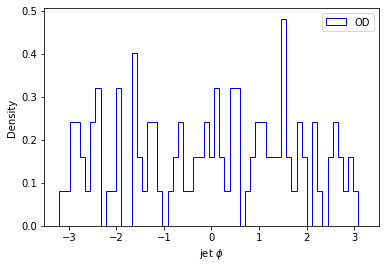

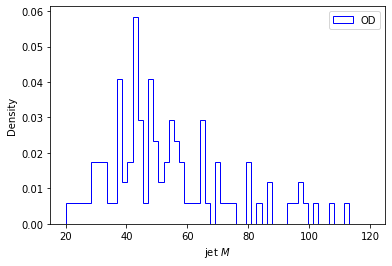

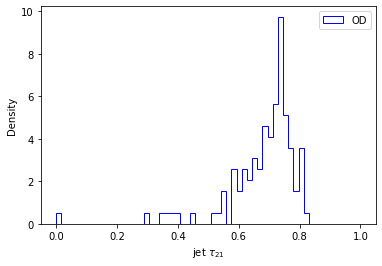

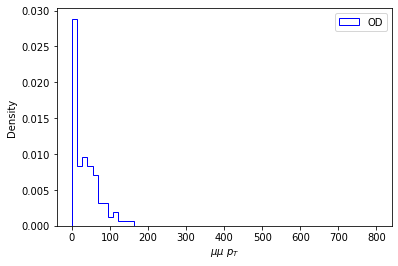

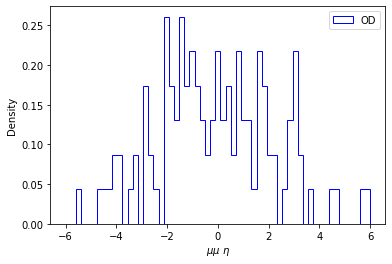

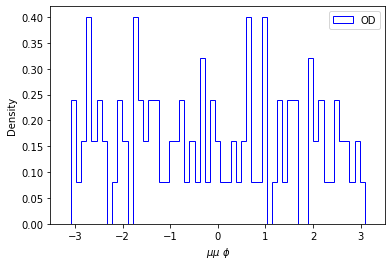

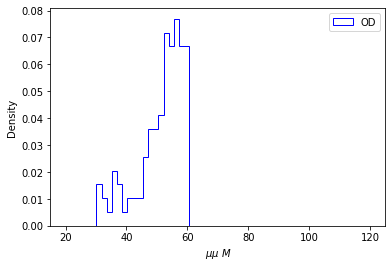

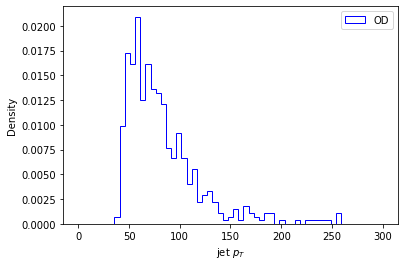

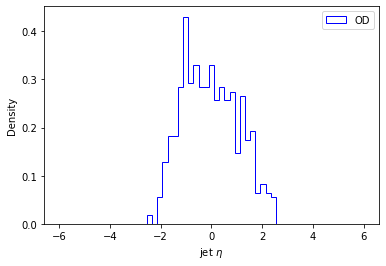

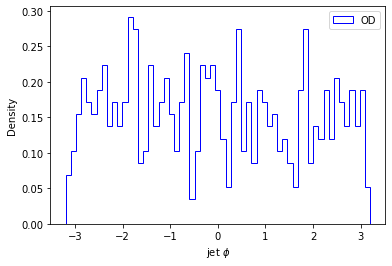

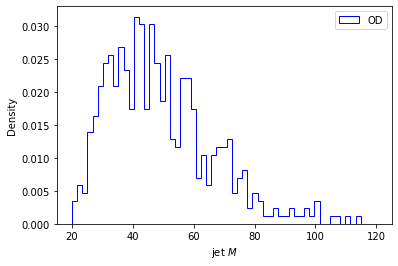

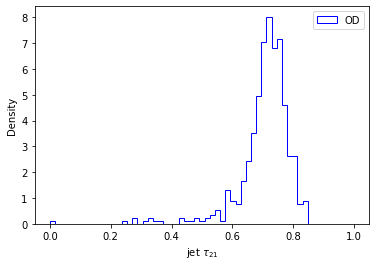

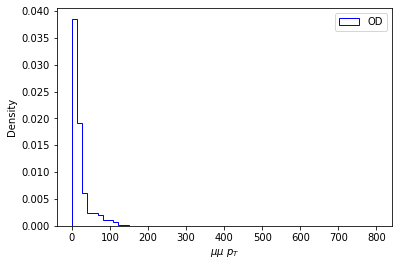

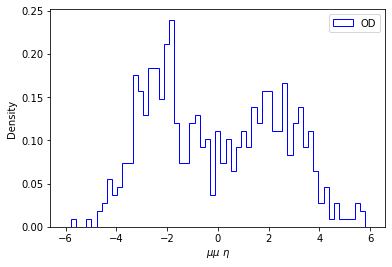

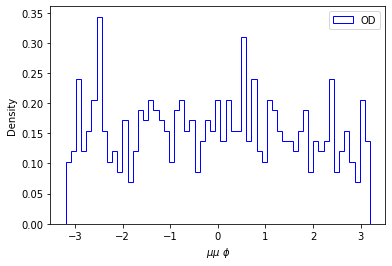

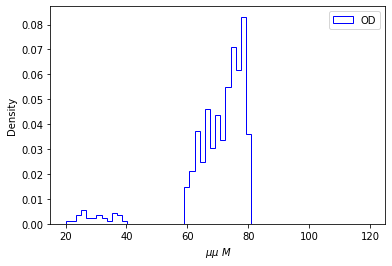

In [41]:


hist_all_features(codes_list, SR_data_preprocc, kwargs_dict, feature_labels, feature_bins)
hist_all_features(codes_list, SB_data_preprocc, kwargs_dict, feature_labels, feature_bins)

## Preprocessing

Standard scaling is fine

In [42]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

SR_data_procc = {}
SB_data_procc = {}

for code in codes_list:
    
    
    #scaler = MinMaxScaler(feature_range = (-3, 3))
    scaler = StandardScaler()
    
    SB_data_procc[code] = scaler.fit_transform(SB_data_preprocc[code])
    SR_data_procc[code] = scaler.transform(SR_data_preprocc[code])



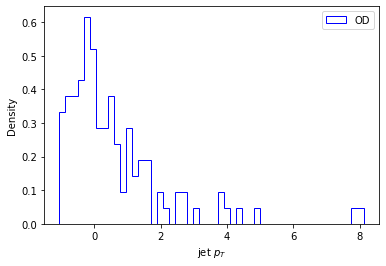

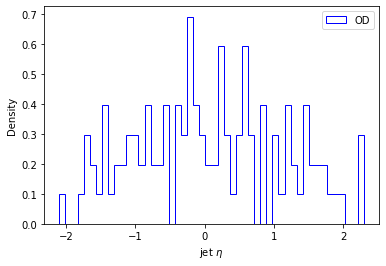

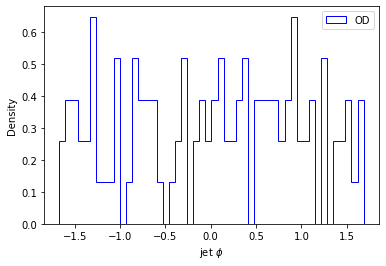

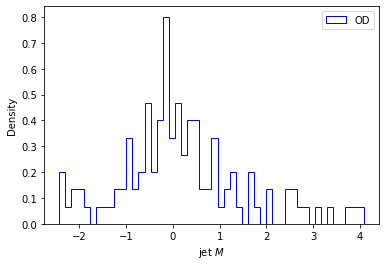

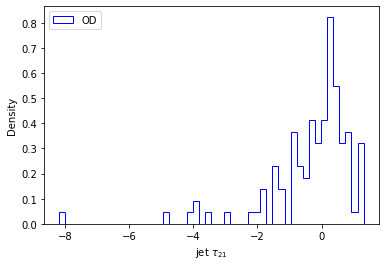

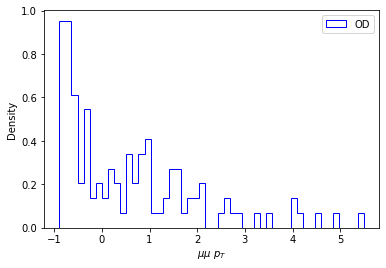

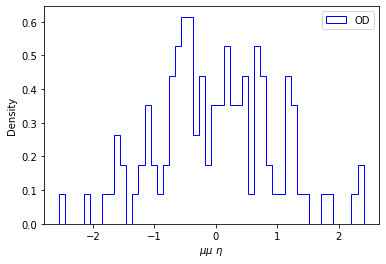

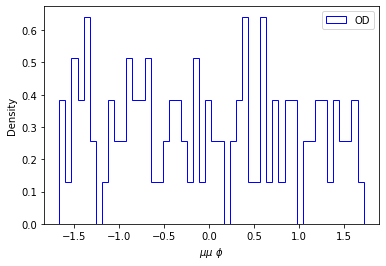

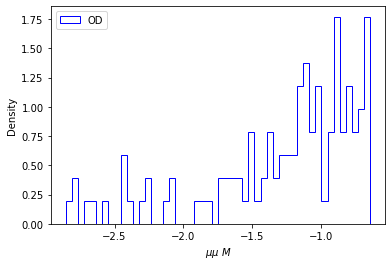

In [43]:
hist_all_features(codes_list, SR_data_procc, kwargs_dict, feature_labels, [50 for i in range(9)], image_path = "plots/procc_data")


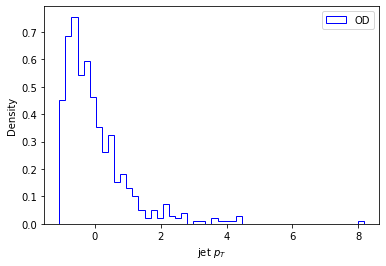

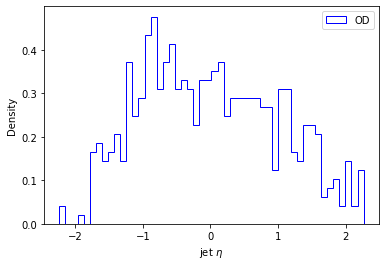

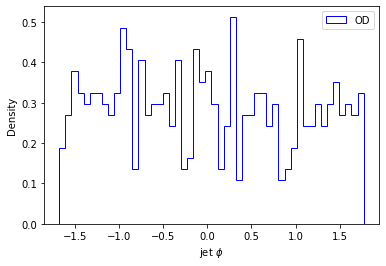

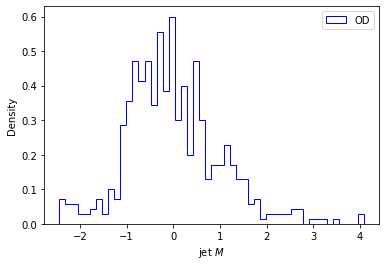

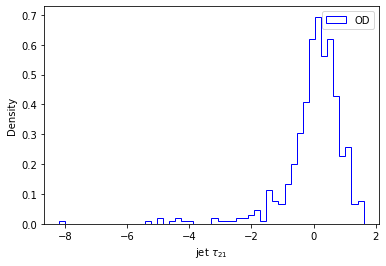

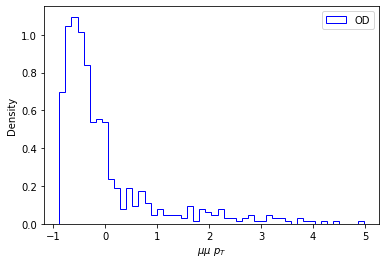

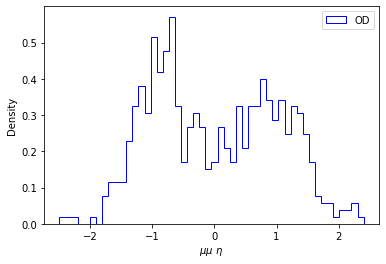

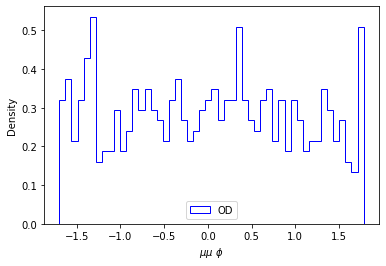

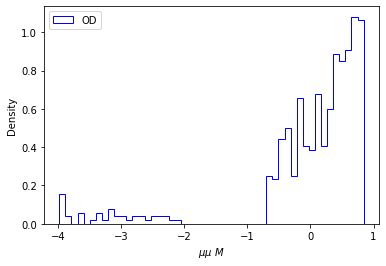

In [44]:
hist_all_features(codes_list, SB_data_procc, kwargs_dict, feature_labels, [50 for i in range(9)], image_path = "plots/procc_data")


In [45]:
for code in codes_list:
    
    np.save(f"processed_data/{code}_SB_standard.npy", SB_data_procc[code])
    np.save(f"processed_data/{code}_SR_standard.npy", SR_data_procc[code])
